# Categorical deduction (generic, all inferences, mutually exclusive)

1. Take one statement at a time, including mutually exclusive (all sets disjoint from each other). build statement queue. 
2. Create powerset of combinations of specific statements
3. create a inference graph for each combination of specific statements.
4. Make all possible inferences for each graph (chain)
5. present the union of possible conclusions for each node

In [1]:
# Syllogism specific statements 
# First statement A __ B. 
# Second statement B __ C.
# Third statement A ___ C -> look up tables to check if true, possible, or false.

specific_statement_options = {'disjoint from','overlaps with','subset of','superset of','identical to'}

# make a dictionary. key is a tuple with first statement type, second statement type and third statement type and value is True, Possible, False
Truth_Table = dict()
Truth_Table[( 'subset of', 'subset of', 'subset of')] = 'True'
Truth_Table[( 'identical to', 'subset of', 'subset of')] = 'True'
Truth_Table[( 'overlaps with', 'subset of', 'subset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'subset of', 'subset of')] = 'Possible'
Truth_Table[( 'superset of', 'subset of', 'subset of')] = 'Possible'
Truth_Table[( 'subset of', 'identical to', 'subset of')] = 'True'
Truth_Table[( 'identical to', 'identical to', 'subset of')] = 'False'
Truth_Table[( 'overlaps with', 'identical to', 'subset of')] = 'False'
Truth_Table[( 'disjoint from', 'identical to', 'subset of')] = 'False'
Truth_Table[( 'superset of', 'identical to', 'subset of')] = 'False'
Truth_Table[( 'subset of', 'overlaps with', 'subset of')] = 'Possible'
Truth_Table[( 'identical to', 'overlaps with', 'subset of')] = 'False'
Truth_Table[( 'overlaps with', 'overlaps with', 'subset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'subset of')] = 'Possible'
Truth_Table[( 'superset of', 'overlaps with', 'subset of')] = 'False'
Truth_Table[( 'subset of', 'disjoint from', 'subset of')] = 'False'
Truth_Table[( 'identical to', 'disjoint from', 'subset of')] = 'False'
Truth_Table[( 'overlaps with', 'disjoint from', 'subset of')] = 'False'
Truth_Table[( 'disjoint from', 'disjoint from', 'subset of')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'subset of')] = 'False'
Truth_Table[( 'subset of', 'superset of', 'subset of')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'subset of')] = 'False'
Truth_Table[( 'overlaps with', 'superset of', 'subset of')] = 'False'
Truth_Table[( 'disjoint from', 'superset of', 'subset of')] = 'False'
Truth_Table[( 'superset of', 'superset of', 'subset of')] = 'False'
Truth_Table[( 'subset of', 'subset of', 'identical to')] = 'False'
Truth_Table[( 'identical to', 'subset of', 'identical to')] = 'False'
Truth_Table[( 'overlaps with', 'subset of', 'identical to')] = 'False'
Truth_Table[( 'disjoint from', 'subset of', 'identical to')] = 'False'
Truth_Table[( 'superset of', 'subset of', 'identical to')] = 'Possible'
Truth_Table[( 'subset of', 'identical to', 'identical to')] = 'False'
Truth_Table[( 'identical to', 'identical to', 'identical to')] = 'True'
Truth_Table[( 'overlaps with', 'identical to', 'identical to')] = 'False'
Truth_Table[( 'disjoint from', 'identical to', 'identical to')] = 'False'
Truth_Table[( 'superset of', 'identical to', 'identical to')] = 'False'
Truth_Table[( 'subset of', 'overlaps with', 'identical to')] = 'False'
Truth_Table[( 'identical to', 'overlaps with', 'identical to')] = 'False'
Truth_Table[( 'overlaps with', 'overlaps with', 'identical to')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'identical to')] = 'False'
Truth_Table[( 'superset of', 'overlaps with', 'identical to')] = 'False'
Truth_Table[( 'subset of', 'disjoint from', 'identical to')] = 'False'
Truth_Table[( 'identical to', 'disjoint from', 'identical to')] = 'False'
Truth_Table[( 'overlaps with', 'disjoint from', 'identical to')] = 'False'
Truth_Table[( 'disjoint from', 'disjoint from', 'identical to')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'identical to')] = 'False'
Truth_Table[( 'subset of', 'superset of', 'identical to')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'identical to')] = 'False'
Truth_Table[( 'overlaps with', 'superset of', 'identical to')] = 'False'
Truth_Table[( 'disjoint from', 'superset of', 'identical to')] = 'False'
Truth_Table[( 'superset of', 'superset of', 'identical to')] = 'False'
Truth_Table[( 'subset of', 'subset of', 'overlaps with')] = 'False'
Truth_Table[( 'identical to', 'subset of', 'overlaps with')] = 'False'
Truth_Table[( 'overlaps with', 'subset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'disjoint from', 'subset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'superset of', 'subset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'subset of', 'identical to', 'overlaps with')] = 'False'
Truth_Table[( 'identical to', 'identical to', 'overlaps with')] = 'False'
Truth_Table[( 'overlaps with', 'identical to', 'overlaps with')] = 'True'
Truth_Table[( 'disjoint from', 'identical to', 'overlaps with')] = 'False'
Truth_Table[( 'superset of', 'identical to', 'overlaps with')] = 'False'
Truth_Table[( 'subset of', 'overlaps with', 'overlaps with')] = 'Possible'
Truth_Table[( 'identical to', 'overlaps with', 'overlaps with')] = 'True'
Truth_Table[( 'overlaps with', 'overlaps with', 'overlaps with')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'overlaps with')] = 'Possible'
Truth_Table[( 'superset of', 'overlaps with', 'overlaps with')] = 'Possible'
Truth_Table[( 'subset of', 'disjoint from', 'overlaps with')] = 'False'
Truth_Table[( 'identical to', 'disjoint from', 'overlaps with')] = 'False'
Truth_Table[( 'overlaps with', 'disjoint from', 'overlaps with')] = 'Possible'
Truth_Table[( 'disjoint from', 'disjoint from', 'overlaps with')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'overlaps with')] = 'Possible'
Truth_Table[( 'subset of', 'superset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'overlaps with')] = 'False'
Truth_Table[( 'overlaps with', 'superset of', 'overlaps with')] = 'Possible'
Truth_Table[( 'disjoint from', 'superset of', 'overlaps with')] = 'False'
Truth_Table[( 'superset of', 'superset of', 'overlaps with')] = 'False'
Truth_Table[( 'subset of', 'subset of', 'disjoint from')] = 'False'
Truth_Table[( 'identical to', 'subset of', 'disjoint from')] = 'False'
Truth_Table[( 'overlaps with', 'subset of', 'disjoint from')] = 'False'
Truth_Table[( 'disjoint from', 'subset of', 'disjoint from')] = 'Possible'
Truth_Table[( 'superset of', 'subset of', 'disjoint from')] = 'False'
Truth_Table[( 'subset of', 'identical to', 'disjoint from')] = 'False'
Truth_Table[( 'identical to', 'identical to', 'disjoint from')] = 'False'
Truth_Table[( 'overlaps with', 'identical to', 'disjoint from')] = 'False'
Truth_Table[( 'disjoint from', 'identical to', 'disjoint from')] = 'True'
Truth_Table[( 'superset of', 'identical to', 'disjoint from')] = 'False'
Truth_Table[( 'subset of', 'overlaps with', 'disjoint from')] = 'Possible'
Truth_Table[( 'identical to', 'overlaps with', 'disjoint from')] = 'False'
Truth_Table[( 'overlaps with', 'overlaps with', 'disjoint from')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'disjoint from')] = 'Possible'
Truth_Table[( 'superset of', 'overlaps with', 'disjoint from')] = 'False'
Truth_Table[( 'subset of', 'disjoint from', 'disjoint from')] = 'True'
Truth_Table[( 'identical to', 'disjoint from', 'disjoint from')] = 'True'
Truth_Table[( 'overlaps with', 'disjoint from', 'disjoint from')] = 'Possible'
Truth_Table[( 'disjoint from', 'disjoint from', 'disjoint from')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'disjoint from')] = 'Possible'
Truth_Table[( 'subset of', 'superset of', 'disjoint from')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'disjoint from')] = 'False'
Truth_Table[( 'overlaps with', 'superset of', 'disjoint from')] = 'Possible'
Truth_Table[( 'disjoint from', 'superset of', 'disjoint from')] = 'True'
Truth_Table[( 'superset of', 'superset of', 'disjoint from')] = 'False'
Truth_Table[( 'subset of', 'subset of', 'superset of')] = 'False'
Truth_Table[( 'identical to', 'subset of', 'superset of')] = 'False'
Truth_Table[( 'overlaps with', 'subset of', 'superset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'subset of', 'superset of')] = 'False'
Truth_Table[( 'superset of', 'subset of', 'superset of')] = 'Possible'
Truth_Table[( 'subset of', 'identical to', 'superset of')] = 'False'
Truth_Table[( 'identical to', 'identical to', 'superset of')] = 'False'
Truth_Table[( 'overlaps with', 'identical to', 'superset of')] = 'False'
Truth_Table[( 'disjoint from', 'identical to', 'superset of')] = 'False'
Truth_Table[( 'superset of', 'identical to', 'superset of')] = 'True'
Truth_Table[( 'subset of', 'overlaps with', 'superset of')] = 'False'
Truth_Table[( 'identical to', 'overlaps with', 'superset of')] = 'False'
Truth_Table[( 'overlaps with', 'overlaps with', 'superset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'overlaps with', 'superset of')] = 'False'
Truth_Table[( 'superset of', 'overlaps with', 'superset of')] = 'Possible'
Truth_Table[( 'subset of', 'disjoint from', 'superset of')] = 'False'
Truth_Table[( 'identical to', 'disjoint from', 'superset of')] = 'False'
Truth_Table[( 'overlaps with', 'disjoint from', 'superset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'disjoint from', 'superset of')] = 'Possible'
Truth_Table[( 'superset of', 'disjoint from', 'superset of')] = 'Possible'
Truth_Table[( 'subset of', 'superset of', 'superset of')] = 'Possible'
Truth_Table[( 'identical to', 'superset of', 'superset of')] = 'True'
Truth_Table[( 'overlaps with', 'superset of', 'superset of')] = 'Possible'
Truth_Table[( 'disjoint from', 'superset of', 'superset of')] = 'False'
Truth_Table[( 'superset of', 'superset of', 'superset of')] = 'True'



In [2]:
major_premise = 'subset of'
minor_premise = 'subset of'
conclusion = 'subset of'
truth_value = Truth_Table[(major_premise,minor_premise,conclusion)]
print(truth_value)

def truth_value_additive(major_premise,minor_premise,conclusion):
    return Truth_Table[(major_premise,minor_premise,conclusion)]

def all_true_specific(major_premise,minor_premise):
    return [x for x in specific_statement_options if Truth_Table[(major_premise,minor_premise,x)]=='True']

def all_possible_specific(major_premise,minor_premise):
    return [x for x in specific_statement_options if Truth_Table[(major_premise,minor_premise,x)]=='Possible']

def all_false_specific(major_premise,minor_premise):
    return [x for x in specific_statement_options if Truth_Table[(major_premise,minor_premise,x)]=='False']


True


In [3]:
truth_value_additive('subset of','superset of','overlaps with')

'Possible'

In [4]:
all_true_specific('subset of','overlaps with')

[]

In [5]:
reverse_implications = dict()
reverse_implications['subset of']='superset of'
reverse_implications['identical to']='identical to'
reverse_implications['overlaps with']='overlaps with'
reverse_implications['disjoint from']='disjoint from'
reverse_implications['superset of']='subset of'


In [6]:
generic_statement_options = {'All','Some','No','Some_not'} # universal affirmative, particular affirmative, universal negative, particular negative
generic_to_specific = dict()
generic_to_specific['All'] = {'subset of','identical to'}  
generic_to_specific['No'] = {'disjoint from'}
generic_to_specific['Some'] = {'overlaps with','subset of','identical to','superset of'} # generic_to_specific['All'].union({'superset of','overlaps with'})
generic_to_specific['Some_not'] = {'overlaps with','disjoint from','superset of'} # generic_to_specific['No'].union({'superset of','overlaps with'})


In [7]:
# Mutually exclusive:
def mutually_exclusive(listofsets):
    return [[x,'disjoint from',y] for x in listofsets for y in listofsets if x!=y]

In [8]:
mutually_exclusive(['A','B']) .   

SyntaxError: invalid syntax (<ipython-input-8-e5ce3af184e3>, line 1)

In [9]:
def collectively_exhaustive(listofsubsets,superset):
    # all of these subsets are subsets of superset. 
    # the union of all these subsets is the superset.
    # i.e if x is an instance in superset, and x is not an instance of a certain number of these subsets, it is an instance
    # of at least one of the others.
    # MECE: if x is an instance in superset, and x is an instance of a set, then x is NOT an instance of any of the others
    # MECE: if x is an instance in superset, and x is not an instance of a set, then x is an instance of exactly one of the
    # remaining subsets.
    
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-9-e90c14e1bbc5>, line 11)

In [10]:
# generic premises and conclusion: tautology, fallacy, or possible if
# take in generic premises, make powersets of major and minor premise possibilities,
# get the truth value for each, and get the joint conclusion: 
# always true (tautology), sometimes true or possible, and always false
import itertools

generic_major_premise = 'All'
generic_minor_premise = 'No'
generic_conclusion = 'No'

possibilities = list(itertools.product(generic_to_specific[generic_major_premise],generic_to_specific[generic_minor_premise],generic_to_specific[generic_conclusion]))

truth_value_list = []
for p in possibilities:
    truth_value_list.append(truth_value_additive(p[0],p[1],p[2]))
print(possibilities,truth_value_list)

[('subset of', 'disjoint from', 'disjoint from'), ('identical to', 'disjoint from', 'disjoint from')] ['True', 'True']


In [11]:
def generic_truth_value_additive(generic_major_premise,generic_minor_premise,generic_conclusion):
    possibilities = list(itertools.product(generic_to_specific[generic_major_premise],generic_to_specific[generic_minor_premise],generic_to_specific[generic_conclusion]))
    truth_value_list = []
    for p in possibilities:
        truth_value_list.append(truth_value_additive(p[0],p[1],p[2]))
    print(possibilities,truth_value_list)
    if ('True' in truth_value_list) and ('False' not in truth_value_list) and ('Possible' not in truth_value_list):
        return 'True'
    elif ('False' in truth_value_list) and ('True' in truth_value_list):
        return 'Possible'
    elif ('Possible' in truth_value_list):
        return 'Possible'
    elif ('False' in truth_value_list) and ('Possible' not in truth_value_list) and ('True' not in truth_value_list):
        return 'False'
    else:
        return 'Not valid truth values'
  

In [12]:
generic_truth_value_additive('Some','No','No')

[('superset of', 'disjoint from', 'disjoint from'), ('subset of', 'disjoint from', 'disjoint from'), ('overlaps with', 'disjoint from', 'disjoint from'), ('identical to', 'disjoint from', 'disjoint from')] ['Possible', 'True', 'Possible', 'True']


'Possible'

In [13]:
# reverse implications, additive only (A,B) - (B,C) - (A,C)
# define sets
sets = ['A','B','C']

first_statement = ['B','subset of','A']
second_statement = ['C','overlaps with','B']
third_statement = ['C','disjoint from','A']

additive_set_order_check = dict()
additive_set_order_check['first'] = (0,1)
additive_set_order_check['second'] = (1,2)
additive_set_order_check['third'] = (0,2)
# check if a statement needs to be reversed
def check_reverse_specific(statement,stype,sets):
        if (statement[0]==sets[additive_set_order_check[stype][0]]) and (statement[2]==sets[additive_set_order_check[stype][1]]):
            print('straight')
            return statement
        else:
            print('reverse')
            return [statement[2],reverse_implications[statement[1]],statement[0]]
            
# Ideally, should auto calculate order or sets. or alternatively, calculate the reverse of each statement as an inference.




In [14]:
# Given a set of statements in the form ['A', 'disjoint from','B'], make all inferences, find all contradictions. 
import networkx as nx
del(infG)
statement_set = [['A','subset of','B'],['B','subset of','C'],['D','identical to','C']]
# make a graph? 
infG = nx.DiGraph()
# get list of nodes from elt 0 and 2 from each statement
setnodes = set()
fromnodes = set()
tonodes = set()
for statement in statement_set:
    fromnodes.add(statement[0])
    tonodes.add(statement[2])
    infG.add_edge(statement[0],statement[2],rel = statement[1])
setnodes = fromnodes.union(tonodes)
print(fromnodes,tonodes, setnodes)
roots = fromnodes-tonodes
ends = tonodes - fromnodes
print(roots,ends)

NameError: name 'infG' is not defined

In [15]:
import matplotlib.pyplot as plt
#nx.draw_spectral(infG,with_labels=True,edge_labels = 'rel' font_size=18,node_size=1200)

In [16]:
pos = nx.spectral_layout(infG)
nx.draw(infG, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(infG,'rel')
nx.draw_networkx_edge_labels(infG, pos, labels = edge_labels)
#plt.savefig('this.png')
plt.show()
#nx.get_edge_attributes(infG,'rel')

NameError: name 'infG' is not defined

In [17]:
# getting reverse implications and redrawing graph
infGr = nx.DiGraph()
for statement in statement_set:
    infGr.add_edge(statement[2],statement[0],rel = reverse_implications[statement[1]])
pos = nx.spectral_layout(infGr)
nx.draw(infGr, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(infGr,'rel')
nx.draw_networkx_edge_labels(infGr, pos, labels = edge_labels)
#plt.savefig('this.png')
plt.show()

# note this rewrites the latest edges, and doesn't show multiple edges between nodes, which is annoying. 

NameError: name 'statement_set' is not defined

In [18]:
def make_all_inferences(infGc):
    roots = {n for n in infG.nodes if list(infG.predecessors(n))==[]}
    ends = {n for n in infG.nodes if list(infG.successors(n))==[]}
    
    infG1 = infGc.copy()
    
    prev_paths = ['']
    no_more_inf_flag = 0
    contradiction_found = 0
    while no_more_inf_flag==0:
        # calculating paths between roots and ends
        paths = dict()
        num_infs= 0
        for r in roots:
            paths[r] = dict()
            for e in ends:
                paths[r][e] = list(nx.all_simple_paths(infG1,r,e))

        paths[r][e]= [p for p in paths[r][e] if p not in prev_paths]
        prev_paths = prev_paths + paths[r][e]
        
        
        
        for r in roots:
            for e in ends:
                for p in paths[r][e]:
                    print(p)
                    for i in range(len(p)-2):
                        print(p[i],p[i+1],p[i+2])
                        inf = all_true_specific(infG1.edges[(p[i],p[i+1])]['rel'],infG1.edges[(p[i+1],p[i+2])]['rel'])
                        if len(inf)>0:
                            # catch contradictions
                            if (p[i],p[i+2]) in infG1.edges():
                                if infG1.edges[(p[i],p[i+2])]['rel'] not in inf:
                                    print('Contradicting relationship between ',p[i],' and ',p[i+2],' already exists as ',infG1.edges[(p[i],p[i+2])]['rel'])
                                    contradiction_found = 1
                            else:
                                print('Since ',p[i],infG1.edges[(p[i],p[i+1])]['rel'],p[i+1],', and ',p[i+1],infG1.edges[(p[i+1],p[i+2])]['rel'],p[i+2],', this means')
                                print(p[i],inf[0],p[i+2])
                                infG1.add_edge(p[i],p[i+2],rel=inf[0])
                                fromnodes.add(p[i])
                                tonodes.add(p[i+2])
                                num_infs= num_infs+1
        if (num_infs==0) or (contradiction_found==1):
            no_more_inf_flag = 1

    if contradiction_found==1:
        print('not updating graph since contradiction found')
        del(infG1)
    else: 
        infGc = infG1.copy()
        del(infG1)

    edges = list(infGc.edges())
    for edge in edges:
        print(edge,infGc.edges[edge]['rel'])
    return (infGc,contradiction_found)

In [19]:
(infG,cd_found) = make_all_inferences(infG)
if cd_found==1:
    print('not changing graph until contradiction resolved')
else:
    print('Updated graph')

NameError: name 'infG' is not defined

In [20]:
del(infG2)

NameError: name 'infG2' is not defined

In [21]:
infG2 = nx.MultiDiGraph()
for (u,v) in infG.edges():
    infG2.add_edge(u,v,0,rel=infG.edges[(u,v)]['rel'])
    infG2.add_edge(v,u,1,rel=reverse_implications[infG.edges[(u,v)]['rel']])

NameError: name 'infG' is not defined

In [22]:
list(nx.all_simple_paths(infG2,'D','A'))

NodeNotFound: source node D not in graph

In [23]:
def get_s_or_r_multi(infG3,u,v):
    if infG3.edges.get((u,v,0),'')=='':
        return 1
    else:
        return 0

def get_rel_multidigraph(infG3,u,v):
    return infG3.edges[(u,v,get_s_or_r_multi(infG3,u,v))]['rel']
    

In [24]:
roots = {n for n in infG.nodes if list(infG.predecessors(n))==[]}
ends = {n for n in infG.nodes if list(infG.successors(n))==[]}
print(roots,ends)

prev_paths = ['']
paths = dict()
for r in roots:
    paths[r] = dict()
    for e in ends:
        paths[r][e] = list(nx.all_simple_paths(infG2,r,e))
print(paths)

NameError: name 'infG' is not defined

In [25]:
all_true_specific(get_rel_multidigraph(infG2,'D','C'),get_rel_multidigraph(infG2,'C','B'))

KeyError: 'D'

In [26]:
def make_all_inferences_multi(infGc):
    # make multidigraph
    infG2 = nx.MultiDiGraph()
    roots = list(infG.nodes())
    ends = list(infG.nodes())
    if str(type(infGc))=="<class 'networkx.classes.multidigraph.MultiDiGraph'>": 
        for (u,v) in infGc.edges():
            if get_s_or_r_multi(infGc,u,v)==0:
                infG2.add_edge(u,v,0,rel=get_rel_multidigraph(infGc,u,v))
                infG2.add_edge(v,u,1,rel=reverse_implications[get_rel_multidigraph(infGc,u,v)])
            else:
                infG2.add_edge(u,v,1,rel=get_rel_multidigraph(infGc,u,v))
                infG2.add_edge(v,u,0,rel=reverse_implications[get_rel_multidigraph(infGc,u,v)])
    elif str(type(infGc))=="<class 'networkx.classes.digraph.DiGraph'>":
        #roots = {n for n in infG.nodes if list(infG.predecessors(n))==[]}
        #ends = {n for n in infG.nodes if list(infG.successors(n))==[]}
        
        for (u,v) in infGc.edges():
            infG2.add_edge(u,v,0,rel=infGc.edges[(u,v)]['rel'])
            infG2.add_edge(v,u,1,rel=reverse_implications[infGc.edges[(u,v)]['rel']])
    else:
        print('Only directed graphs or multidirected graphs accepted')
        return ('','')

    prev_paths = []
    no_more_inf_flag = 0
    contradiction_found = 0
    while no_more_inf_flag==0:
        # calculating paths between roots and ends
        paths = dict()
        num_infs= 0
        for r in roots:
            paths[r] = dict()
            for e in ends:
                paths[r][e] = list(nx.all_simple_paths(infG2,r,e))

        paths[r][e]= [p for p in paths[r][e] if p not in prev_paths]
        prev_paths = prev_paths + paths[r][e]
        #print(prev_paths)
        
        
        for r in roots:
            for e in ends:
                for p in paths[r][e]:
                    #print(p)
                    for i in range(len(p)-2):
                        #print(p[i],p[i+1],p[i+2])
                        #print(get_rel_multidigraph(infG2,p[i],p[i+1]))
                        #print(get_rel_multidigraph(infG2,p[i+1],p[i+2]))
                        inf = all_true_specific(get_rel_multidigraph(infG2,p[i],p[i+1]),get_rel_multidigraph(infG2,p[i+1],p[i+2]))
                        if len(inf)>0:
                            # catch contradictions
                            if (p[i],p[i+2]) in infG2.edges():
                                if get_rel_multidigraph(infG2,p[i],p[i+2]) not in inf:
                                    print('Contradicting relationship between ',p[i],' and ',p[i+2],' already exists as ',get_rel_multidigraph(infG2,p[i],p[i+2]))
                                    contradiction_found = 1
                            else:
                                print('Since ',p[i],get_rel_multidigraph(infG2,p[i],p[i+1]),p[i+1],', and ',p[i+1],get_rel_multidigraph(infG2,p[i+1],p[i+2]),p[i+2],', this means')
                                print(p[i],inf[0],p[i+2])
                                infG2.add_edge(p[i],p[i+2],0,rel=inf[0])
                                fromnodes.add(p[i])
                                tonodes.add(p[i+2])
                                num_infs= num_infs+1
        if (num_infs==0) or (contradiction_found==1):
            no_more_inf_flag = 1

    if contradiction_found==1:
        print('not updating graph since contradiction found')
        del(infG2)
    else: 
        infGc = infG2.copy()
        del(infG2)

    edges = list(infGc.edges())
    for (u,v) in edges:
        print('(',u,',',v,')',get_rel_multidigraph(infGc,u,v))
    return (infGc,contradiction_found)

In [27]:
(infG,cd) = make_all_inferences_multi(infG)

NameError: name 'infG' is not defined

In [28]:
roots = list(infG.nodes())
ends = list(infG.nodes())

NameError: name 'infG' is not defined

In [29]:
for r in roots:
    for e in ends:
        print(list(nx.all_simple_paths(infG,r,e)))

NameError: name 'roots' is not defined

In [30]:
print(generic_to_specific['All'].intersection(generic_to_specific['Some']))
print(generic_to_specific['Some'].intersection(generic_to_specific['Some_not']))
print(generic_to_specific['Some_not'].intersection(generic_to_specific['No']))
print(generic_to_specific['No'].intersection(generic_to_specific['All']))
print(generic_to_specific['All'].intersection(generic_to_specific['Some_not']))
print(generic_to_specific['Some'].intersection(generic_to_specific['No']))

{'subset of', 'identical to'}
{'superset of', 'overlaps with'}
{'disjoint from'}
set()
set()
set()


In [31]:
def validate_statement(statement_set,new_statement):
    # validating each new statement against existing statement set: assuming that the existing statement is already done with chain inferencing. 
    # statement set for each inference graph in possible ones should be considered, and if we can find the ones that satisfy. display the ones that don't and reduce possibilities. 
    # if a statement is encountered (specific or generic) that is completely new nodes, add (mark citation)
    # if a statement is encountered (specific or generic) that uses one new node and one existing, add (mark citation)
    # if a statement is encountered that uses the same two nodes in same order: 
    # if new statement and any old statement with same nodes are specific and different it is a contradiction and needs to be resolved.
    # consider saving for each edge which statements it is inferred from so a chain can be established and displayed
    # if new statement is specific and the combination of old ones is generic-specific combination, specific statement should be in generic_to_specific[dict] intersection of previous statements
    # if new statement is generic and the old ones are a combination, the intersection of the new with the old should be displayed and verified. if intersection is nullset, throw up contradiction to resolve. 
    # if a statement with reverse nodes is encountered, reverse and follow above instructions. 

SyntaxError: unexpected EOF while parsing (<ipython-input-31-85fb0382301d>, line 11)

[['subset of', 'identical to'], ['subset of', 'identical to'], ['superset of', 'subset of', 'overlaps with', 'identical to']] 



[['subset of', 'subset of', 'superset of'], ['subset of', 'subset of', 'subset of'], ['subset of', 'subset of', 'overlaps with'], ['subset of', 'subset of', 'identical to'], ['subset of', 'identical to', 'superset of'], ['subset of', 'identical to', 'subset of'], ['subset of', 'identical to', 'overlaps with'], ['subset of', 'identical to', 'identical to'], ['identical to', 'subset of', 'superset of'], ['identical to', 'subset of', 'subset of'], ['identical to', 'subset of', 'overlaps with'], ['identical to', 'subset of', 'identical to'], ['identical to', 'identical to', 'superset of'], ['identical to', 'identical to', 'subset of'], ['identical to', 'identical to', 'overlaps with'], ['identical to', 'identical to', 'identical to']]
{0: [['A', 'subset of', 'B'], ['B', 'subset of', 'C'], ['C', 'superset of', 'D']], 1: [['A', 'subset of', 'B'], ['B', 'subset of'

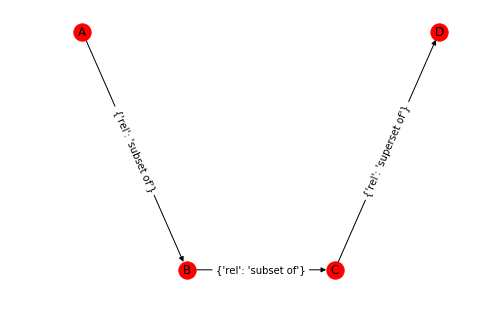

Since  A subset of B , and  B subset of C , this means
A subset of C
Since  C superset of B , and  B superset of A , this means
C superset of A
( A , B ) subset of
( A , C ) subset of
( B , A ) superset of
( B , C ) subset of
( C , B ) superset of
( C , D ) superset of
( C , A ) superset of
( D , C ) subset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


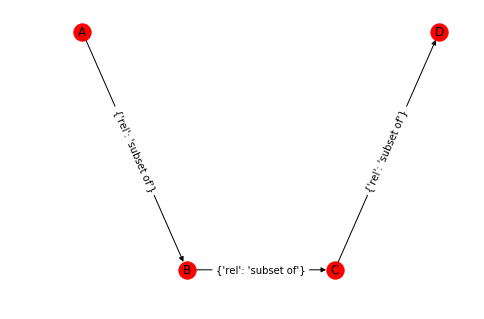

Since  A subset of B , and  B subset of C , this means
A subset of C
Since  B subset of C , and  C subset of D , this means
B subset of D
Since  C superset of B , and  B superset of A , this means
C superset of A
Since  D superset of C , and  C superset of B , this means
D superset of B
Since  A subset of C , and  C subset of D , this means
A subset of D
Since  D superset of C , and  C superset of A , this means
D superset of A
( A , B ) subset of
( A , C ) subset of
( A , D ) subset of
( B , A ) superset of
( B , C ) subset of
( B , D ) subset of
( C , B ) superset of
( C , D ) subset of
( C , A ) superset of
( D , C ) superset of
( D , B ) superset of
( D , A ) superset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


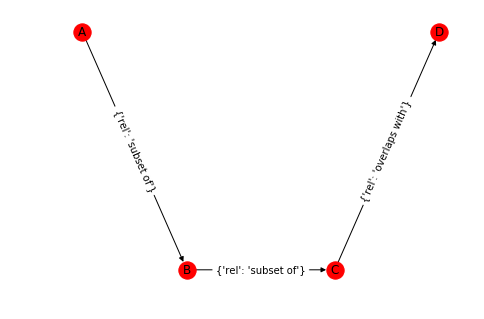

Since  A subset of B , and  B subset of C , this means
A subset of C
Since  C superset of B , and  B superset of A , this means
C superset of A
( A , B ) subset of
( A , C ) subset of
( B , A ) superset of
( B , C ) subset of
( C , B ) superset of
( C , D ) overlaps with
( C , A ) superset of
( D , C ) overlaps with
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


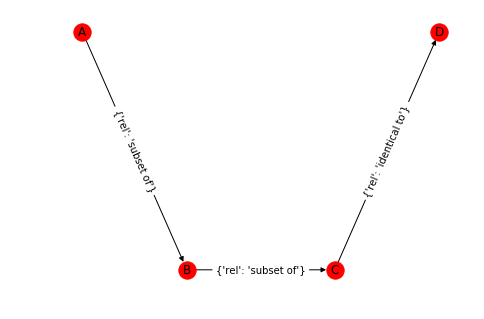

Since  A subset of B , and  B subset of C , this means
A subset of C
Since  B subset of C , and  C identical to D , this means
B subset of D
Since  C superset of B , and  B superset of A , this means
C superset of A
Since  D identical to C , and  C superset of B , this means
D superset of B
Since  A subset of C , and  C identical to D , this means
A subset of D
Since  D identical to C , and  C superset of A , this means
D superset of A
( A , B ) subset of
( A , C ) subset of
( A , D ) subset of
( B , A ) superset of
( B , C ) subset of
( B , D ) subset of
( C , B ) superset of
( C , D ) identical to
( C , A ) superset of
( D , C ) identical to
( D , B ) superset of
( D , A ) superset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


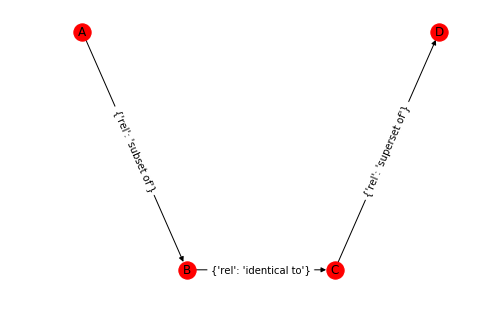

Since  A subset of B , and  B identical to C , this means
A subset of C
Since  B identical to C , and  C superset of D , this means
B superset of D
Since  C identical to B , and  B superset of A , this means
C superset of A
Since  D subset of C , and  C identical to B , this means
D subset of B
( A , B ) subset of
( A , C ) subset of
( B , A ) superset of
( B , C ) identical to
( B , D ) superset of
( C , B ) identical to
( C , D ) superset of
( C , A ) superset of
( D , C ) subset of
( D , B ) subset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


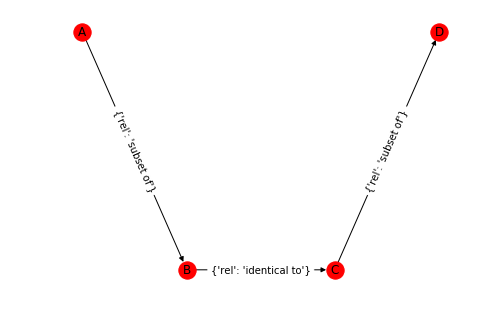

Since  A subset of B , and  B identical to C , this means
A subset of C
Since  B identical to C , and  C subset of D , this means
B subset of D
Since  C identical to B , and  B superset of A , this means
C superset of A
Since  D superset of C , and  C identical to B , this means
D superset of B
Since  A subset of C , and  C subset of D , this means
A subset of D
Since  D superset of C , and  C superset of A , this means
D superset of A
( A , B ) subset of
( A , C ) subset of
( A , D ) subset of
( B , A ) superset of
( B , C ) identical to
( B , D ) subset of
( C , B ) identical to
( C , D ) subset of
( C , A ) superset of
( D , C ) superset of
( D , B ) superset of
( D , A ) superset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


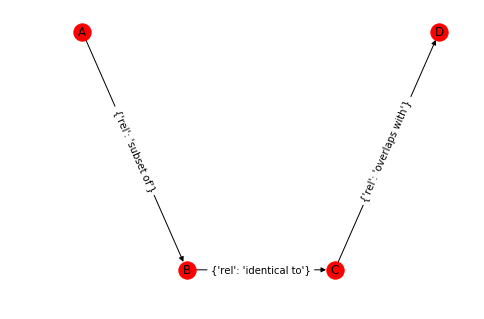

Since  A subset of B , and  B identical to C , this means
A subset of C
Since  B identical to C , and  C overlaps with D , this means
B overlaps with D
Since  C identical to B , and  B superset of A , this means
C superset of A
Since  D overlaps with C , and  C identical to B , this means
D overlaps with B
( A , B ) subset of
( A , C ) subset of
( B , A ) superset of
( B , C ) identical to
( B , D ) overlaps with
( C , B ) identical to
( C , D ) overlaps with
( C , A ) superset of
( D , C ) overlaps with
( D , B ) overlaps with
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


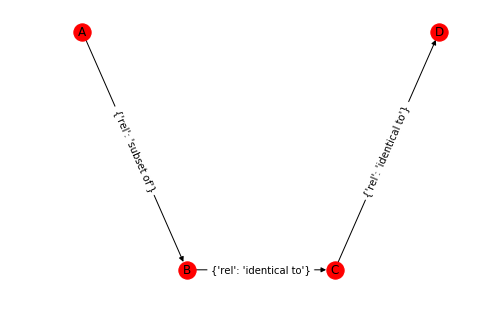

Since  A subset of B , and  B identical to C , this means
A subset of C
Since  B identical to C , and  C identical to D , this means
B identical to D
Since  C identical to B , and  B superset of A , this means
C superset of A
Since  D identical to C , and  C identical to B , this means
D identical to B
Since  A subset of C , and  C identical to D , this means
A subset of D
Since  D identical to C , and  C superset of A , this means
D superset of A
( A , B ) subset of
( A , C ) subset of
( A , D ) subset of
( B , A ) superset of
( B , C ) identical to
( B , D ) identical to
( C , B ) identical to
( C , D ) identical to
( C , A ) superset of
( D , C ) identical to
( D , B ) identical to
( D , A ) superset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


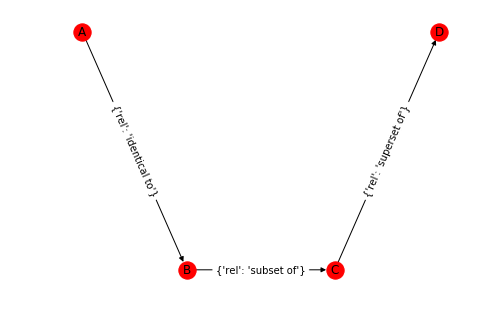

Since  A identical to B , and  B subset of C , this means
A subset of C
Since  C superset of B , and  B identical to A , this means
C superset of A
( A , B ) identical to
( A , C ) subset of
( B , A ) identical to
( B , C ) subset of
( C , B ) superset of
( C , D ) superset of
( C , A ) superset of
( D , C ) subset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


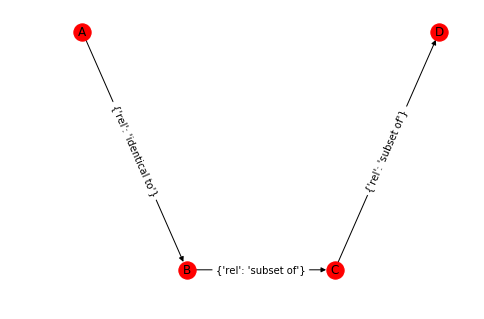

Since  A identical to B , and  B subset of C , this means
A subset of C
Since  B subset of C , and  C subset of D , this means
B subset of D
Since  C superset of B , and  B identical to A , this means
C superset of A
Since  D superset of C , and  C superset of B , this means
D superset of B
Since  A subset of C , and  C subset of D , this means
A subset of D
Since  D superset of C , and  C superset of A , this means
D superset of A
( A , B ) identical to
( A , C ) subset of
( A , D ) subset of
( B , A ) identical to
( B , C ) subset of
( B , D ) subset of
( C , B ) superset of
( C , D ) subset of
( C , A ) superset of
( D , C ) superset of
( D , B ) superset of
( D , A ) superset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


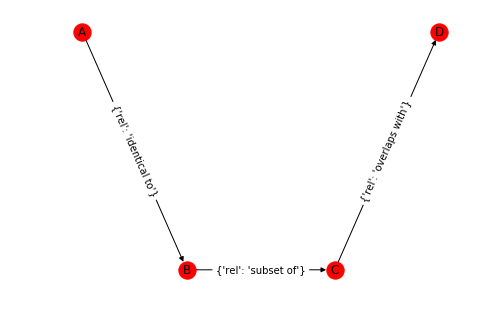

Since  A identical to B , and  B subset of C , this means
A subset of C
Since  C superset of B , and  B identical to A , this means
C superset of A
( A , B ) identical to
( A , C ) subset of
( B , A ) identical to
( B , C ) subset of
( C , B ) superset of
( C , D ) overlaps with
( C , A ) superset of
( D , C ) overlaps with
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


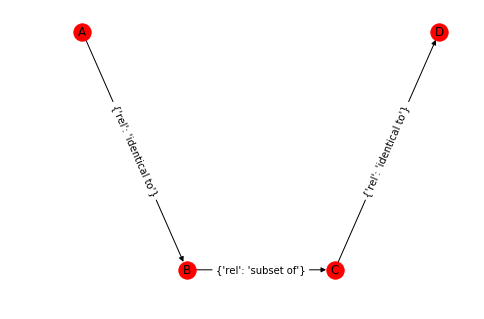

Since  A identical to B , and  B subset of C , this means
A subset of C
Since  B subset of C , and  C identical to D , this means
B subset of D
Since  C superset of B , and  B identical to A , this means
C superset of A
Since  D identical to C , and  C superset of B , this means
D superset of B
Since  A subset of C , and  C identical to D , this means
A subset of D
Since  D identical to C , and  C superset of A , this means
D superset of A
( A , B ) identical to
( A , C ) subset of
( A , D ) subset of
( B , A ) identical to
( B , C ) subset of
( B , D ) subset of
( C , B ) superset of
( C , D ) identical to
( C , A ) superset of
( D , C ) identical to
( D , B ) superset of
( D , A ) superset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


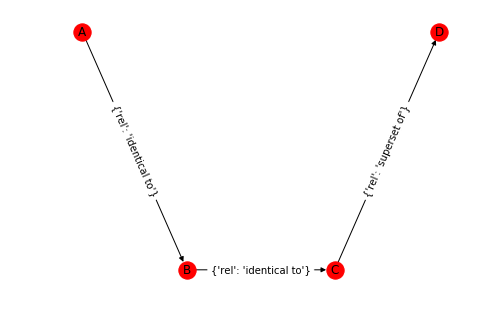

Since  A identical to B , and  B identical to C , this means
A identical to C
Since  B identical to C , and  C superset of D , this means
B superset of D
Since  C identical to B , and  B identical to A , this means
C identical to A
Since  D subset of C , and  C identical to B , this means
D subset of B
Since  A identical to C , and  C superset of D , this means
A superset of D
Since  D subset of C , and  C identical to A , this means
D subset of A
( A , B ) identical to
( A , C ) identical to
( A , D ) superset of
( B , A ) identical to
( B , C ) identical to
( B , D ) superset of
( C , B ) identical to
( C , D ) superset of
( C , A ) identical to
( D , C ) subset of
( D , B ) subset of
( D , A ) subset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


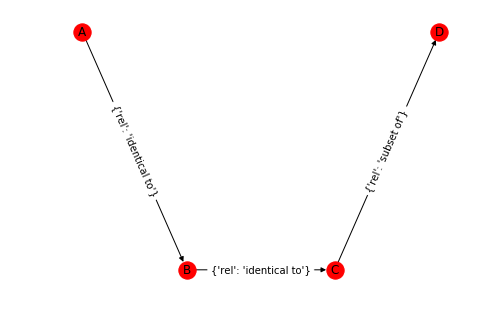

Since  A identical to B , and  B identical to C , this means
A identical to C
Since  B identical to C , and  C subset of D , this means
B subset of D
Since  C identical to B , and  B identical to A , this means
C identical to A
Since  D superset of C , and  C identical to B , this means
D superset of B
Since  A identical to C , and  C subset of D , this means
A subset of D
Since  D superset of C , and  C identical to A , this means
D superset of A
( A , B ) identical to
( A , C ) identical to
( A , D ) subset of
( B , A ) identical to
( B , C ) identical to
( B , D ) subset of
( C , B ) identical to
( C , D ) subset of
( C , A ) identical to
( D , C ) superset of
( D , B ) superset of
( D , A ) superset of
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


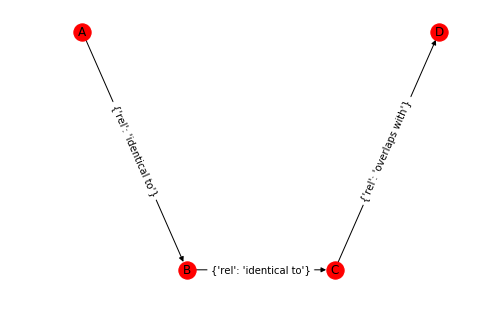

Since  A identical to B , and  B identical to C , this means
A identical to C
Since  B identical to C , and  C overlaps with D , this means
B overlaps with D
Since  C identical to B , and  B identical to A , this means
C identical to A
Since  D overlaps with C , and  C identical to B , this means
D overlaps with B
Since  A identical to C , and  C overlaps with D , this means
A overlaps with D
Since  D overlaps with C , and  C identical to A , this means
D overlaps with A
( A , B ) identical to
( A , C ) identical to
( A , D ) overlaps with
( B , A ) identical to
( B , C ) identical to
( B , D ) overlaps with
( C , B ) identical to
( C , D ) overlaps with
( C , A ) identical to
( D , C ) overlaps with
( D , B ) overlaps with
( D , A ) overlaps with
{'C', 'B', 'A'} {'C', 'D', 'B'} {'D', 'A', 'C', 'B'}
{'A'} {'D'}


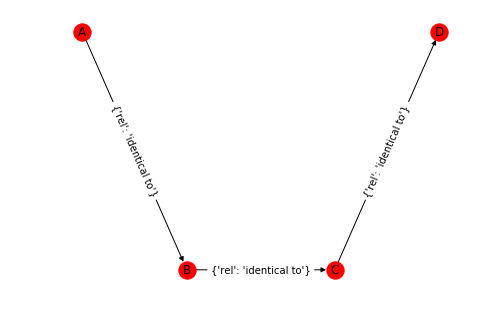

Since  A identical to B , and  B identical to C , this means
A identical to C
Since  B identical to C , and  C identical to D , this means
B identical to D
Since  C identical to B , and  B identical to A , this means
C identical to A
Since  D identical to C , and  C identical to B , this means
D identical to B
Since  A identical to C , and  C identical to D , this means
A identical to D
Since  D identical to C , and  C identical to A , this means
D identical to A
( A , B ) identical to
( A , C ) identical to
( A , D ) identical to
( B , A ) identical to
( B , C ) identical to
( B , D ) identical to
( C , B ) identical to
( C , D ) identical to
( C , A ) identical to
( D , C ) identical to
( D , B ) identical to
( D , A ) identical to


In [32]:
# Generic statements sets 
import itertools
#def powerset_generic_to_specific(generic_statement_set):
generic_statement_set = [['A','All','B'],['B','All','C'],['C','Some','D']]

# add one more step here for multiple generic statements between two nodes - compatible (All,Some), (Some, Some_not), (Some_not, no). incompatible (no,all), (all, some_not), (some, no)
# the incompatible types should be filtered out during entry



# set of converted generic to specific sets
possibilities_set = [list(generic_to_specific[statement[1]]) if statement[1] in generic_statement_options else [statement[1]] for statement in generic_statement_set]
node_set = [[statement[0],statement[2]] for statement in generic_statement_set]
print(possibilities_set,'\n\n\n')

def flattentup(tup):
    flatlist = []
    for elt in tup:
        #print(elt,type(elt))
        if type(elt) is not tuple:
            #print('elt appended')
            flatlist.append(elt)
        else:
            #print('calling recursive')
            flatlist = flatlist + flattentup(elt)
    return flatlist

#combinations = list(itertools.product([ps for ps in possibilities_set]))
#print(combinations)

combinations = possibilities_set[0]
for i in possibilities_set[1:len(possibilities_set)]:
    combinations = list(itertools.product(combinations,i))
#print(combinations)

combinationslist = [flattentup(elt) for elt in combinations]
print(combinationslist)

infgraphdict =dict()
for i in range(len(combinationslist)):
    infgraphdict[i] = []
    for j in range(len(node_set)):
        infgraphdict[i].append([node_set[j][0],combinationslist[i][j],node_set[j][1]])
print(infgraphdict)

import networkx as nx
import matplotlib.pyplot as plt

infdict = dict()
for i in infgraphdict.keys():

    statement_set = infgraphdict[i]
    # make a graph? 
    infG = nx.DiGraph()
    # get list of nodes from elt 0 and 2 from each statement
    setnodes = set()
    fromnodes = set()
    tonodes = set()
    for statement in statement_set:
        fromnodes.add(statement[0])
        tonodes.add(statement[2])
        infG.add_edge(statement[0],statement[2],rel = statement[1])
    setnodes = fromnodes.union(tonodes)
    print(fromnodes,tonodes, setnodes)
    roots = fromnodes-tonodes
    ends = tonodes - fromnodes
    print(roots,ends)
    pos = nx.spectral_layout(infG)
    nx.draw(infG, pos, with_labels=True)
    edge_labels = nx.get_edge_attributes(infG,'rel')
    nx.draw_networkx_edge_labels(infG, pos, labels = edge_labels)
    #plt.savefig('this.png')
    plt.show()
    
    (infdict[i],contradiction_found) = make_all_inferences_multi(infG)
    del(infG)

In [33]:
# get possible relationships for each edge

edge_poss_dict = dict()

for i in infdict.keys():
    #print(i)
    for edge in infdict[i].edges():
        #print(edge)
        if edge not in edge_poss_dict.keys():
            #print('adding new key')
            edge_poss_dict[edge] = list()
            #print(edge_poss_dict[edge])
            #print(type(edge_poss_dict[edge]))
        t = [edge[0],get_rel_multidigraph(infdict[i],edge[0],edge[1]),edge[1]]
        if t not in edge_poss_dict[edge]:
            edge_poss_dict[edge].append(t)
        #print(edge_poss_dict[edge])


print(edge_poss_dict)

# consider converting possibles to smaller generic statement for readability. 

{('A', 'B'): [['A', 'subset of', 'B'], ['A', 'identical to', 'B']], ('A', 'C'): [['A', 'subset of', 'C'], ['A', 'identical to', 'C']], ('B', 'A'): [['B', 'superset of', 'A'], ['B', 'identical to', 'A']], ('B', 'C'): [['B', 'subset of', 'C'], ['B', 'identical to', 'C']], ('C', 'B'): [['C', 'superset of', 'B'], ['C', 'identical to', 'B']], ('C', 'D'): [['C', 'superset of', 'D'], ['C', 'subset of', 'D'], ['C', 'overlaps with', 'D'], ['C', 'identical to', 'D']], ('C', 'A'): [['C', 'superset of', 'A'], ['C', 'identical to', 'A']], ('D', 'C'): [['D', 'subset of', 'C'], ['D', 'superset of', 'C'], ['D', 'overlaps with', 'C'], ['D', 'identical to', 'C']], ('A', 'D'): [['A', 'subset of', 'D'], ['A', 'superset of', 'D'], ['A', 'overlaps with', 'D'], ['A', 'identical to', 'D']], ('B', 'D'): [['B', 'subset of', 'D'], ['B', 'superset of', 'D'], ['B', 'overlaps with', 'D'], ['B', 'identical to', 'D']], ('D', 'B'): [['D', 'superset of', 'B'], ['D', 'subset of', 'B'], ['D', 'overlaps with', 'B'], ['D',

In [34]:
infdict

{0: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0de8e198>,
 1: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0d473748>,
 2: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0e262470>,
 3: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0e252048>,
 4: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f2f56d8>,
 5: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f34b5f8>,
 6: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f3b51d0>,
 7: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f403da0>,
 8: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f2fd400>,
 9: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f4d9b38>,
 10: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0ccd22b0>,
 11: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f3dd4e0>,
 12: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0ddb84e0>,
 13: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f53ff60>,
 14: <networkx.classes.multidigraph.MultiDiGraph at 0x4c0f2ed780>,
 15: 

In [35]:
del(edge_poss_dict)

In [36]:
print([(x,y) for x in range(3) for y in range(3) if x != y])

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]
